# Classification Techniques

So far in this course we have investigated two major problem in supervised machine learning: Regression and Classification.
In this session we will introduce a number of famous classification techniques:

1. KNN
2. Support Vector Machines
3. Random Forest
4. Boosting Techniques

## K-Nearest Neighbors

K-Nearest Neighbors is one of the most basic yet essential classification algorithms in Machine Learning.

This is maybe the most intuitive way of classifying data.
Suppose you have a dataset in a 2-dimensional space like this:

<img src="images/knn_1.png" alt="knn" width="400" height="400">

Now suppose you want to classify a new unlabeled data (query):

<img src="images/knn_2.png" alt="knn" width="400" height="400">

In **KNN** algorithm we find the K nearest points to the query data, and look into labels of these K data. Then based on a majority voting approach assign a label to the query data.

Neighbors-based methods are known as non-generalizing machine learning methods, since they simply "remember" all of its training data.

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification 

In [32]:
X, y = make_classification(n_samples=300, n_features=2, n_classes=3, n_redundant=0, n_clusters_per_class=1, random_state=41)

In [33]:
class_1 = X[y==0]
class_2 = X[y==1]
class_3 = X[y==2]

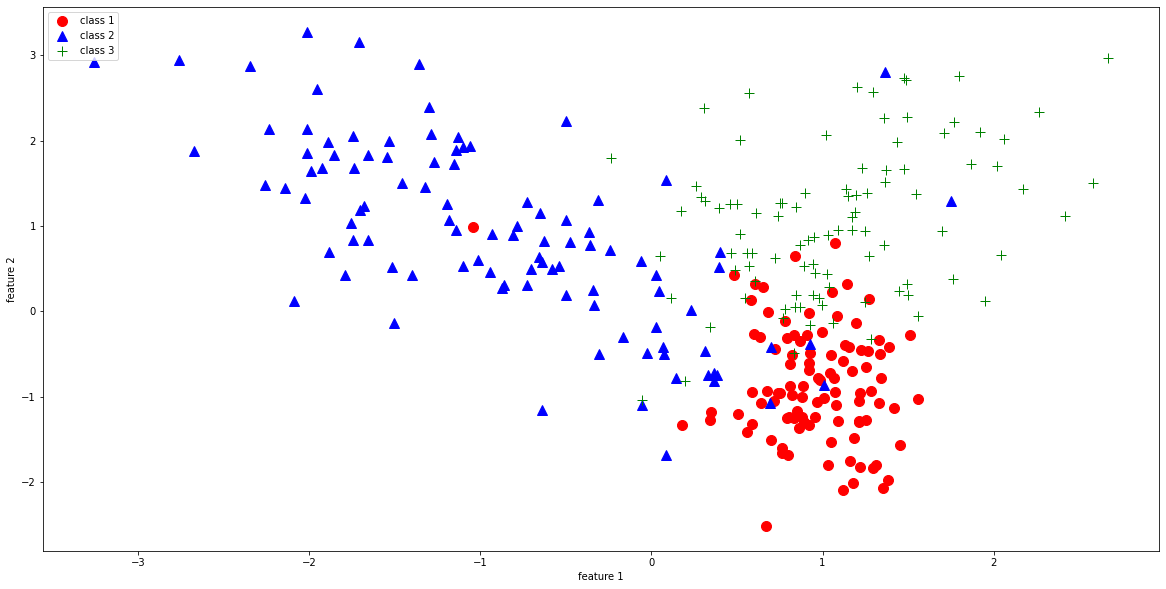

In [34]:
plt.figure(figsize=(20,10))
plt.plot(class_1[:, 0], class_1[:, 1], "ro", markersize=10, label="class 1")
plt.plot(class_2[:, 0], class_2[:, 1], "b^", markersize=10, label="class 2")
plt.plot(class_3[:, 0], class_3[:, 1], "g+", markersize=10, label="class 3")
plt.xlabel("feature 1")
plt.ylabel("feature 2")
plt.legend()

In [35]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [40]:
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)

KNeighborsClassifier()

In [41]:
model.score(X_test, y_test)

0.88

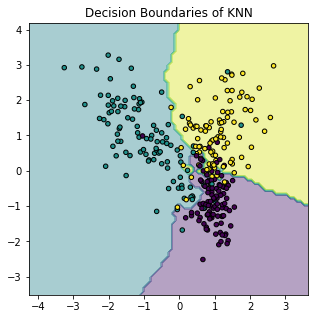

In [42]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

fig, ax = plt.subplots(1, 1, sharex='col', sharey='row', figsize=(5, 5))

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

ax.contourf(xx, yy, Z, alpha=0.4)
ax.scatter(X[:, 0], X[:, 1], c=y,
                              s=20, edgecolor='k')
ax.set_title("Decision Boundaries of KNN")

plt.show()

For bigger K values the decision boundaries become smoother and the algorithm is less sensative to noise.

In cases where the data is not uniformly sampled (in some parts of feature space the data is sparse and in some parts are dense), radius-based neighbors classification can be a better choice. The user specifies a fixed radius and consider only neighbors which are inside that circle for voting, such that points in sparser neighborhoods use fewer nearest neighbors for the classification. For high-dimensional parameter spaces, this method becomes less effective due to the so-called “curse of dimensionality”.

KNN can be used on regression problems too. Instead of voting the average of neighbors can be used.

For more detail on KNN algorithms: https://scikit-learn.org/stable/modules/neighbors.html

## 2. Support Vector Machine (SVM)

Suppose that we have a  **Linearly Seperable** dataset like below:

In [10]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=200, centers=2, n_features=2, center_box=[(0, 20), (20, 0)], random_state=60)
class_1 = X[y==0]
class_2 = X[y==1]

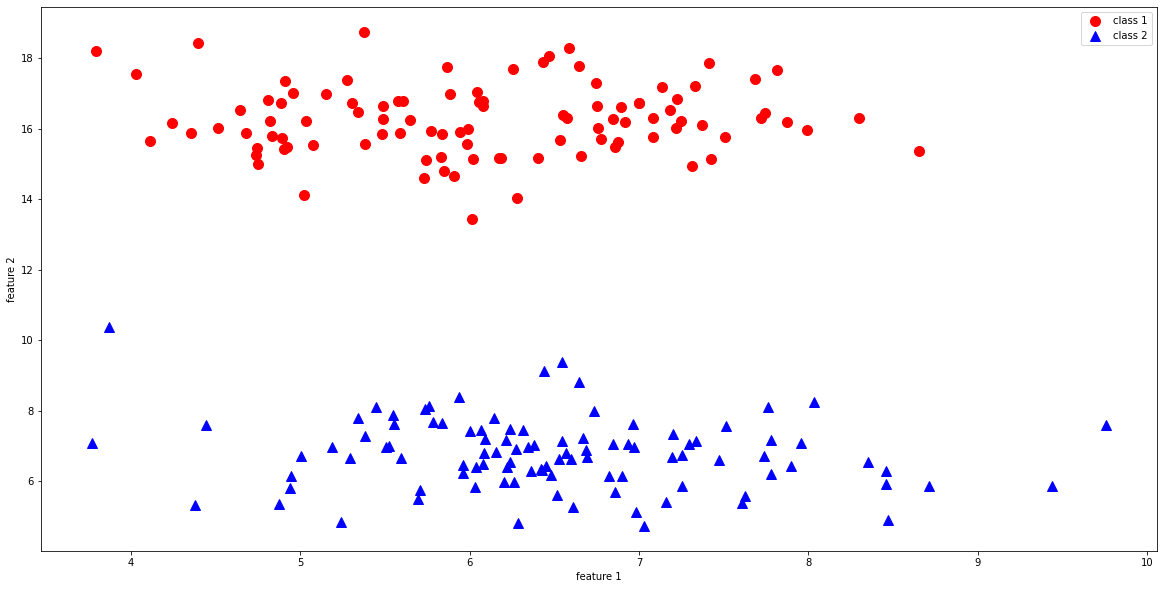

In [11]:
plt.figure(figsize=(20,10))
plt.plot(class_1[:, 0], class_1[:, 1], "ro", markersize=10, label="class 1")
plt.plot(class_2[:, 0], class_2[:, 1], "b^", markersize=10, label="class 2")
plt.xlabel("feature 1")
plt.ylabel("feature 2")
plt.legend()

We want to find a linear classifier that is generalizable to unseen datasets.

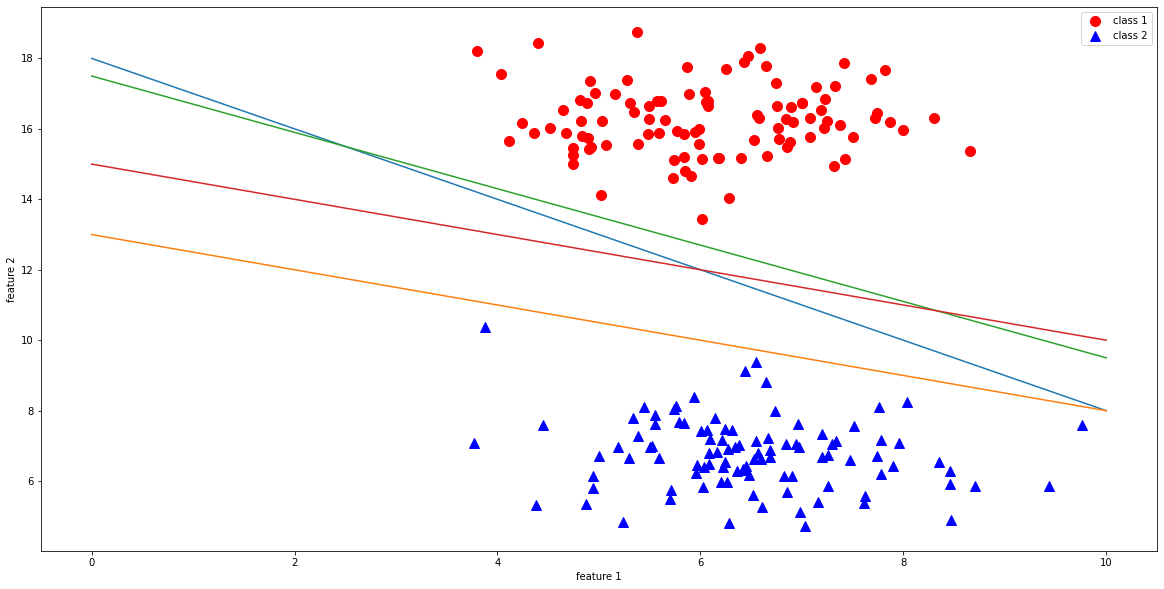

In [12]:
x_plot = np.linspace(0, 10, 500).reshape(-1,1)
y_plot = -1 * x_plot + 18
y_plot_2 = -.5 * x_plot + 13
y_plot_3 = -.8 * x_plot + 17.5
y_plot_4 = -.5 * x_plot + 15
plt.figure(figsize=(20,10))
plt.plot(class_1[:, 0], class_1[:, 1], "ro", markersize=10, label="class 1")
plt.plot(class_2[:, 0], class_2[:, 1], "b^", markersize=10, label="class 2")
plt.plot(x_plot, y_plot)
plt.plot(x_plot, y_plot_2)
plt.plot(x_plot, y_plot_3)
plt.plot(x_plot, y_plot_4)
plt.xlabel("feature 1")
plt.ylabel("feature 2")
plt.legend()

Which one these four decision boundray is more generalizable

In support Vector Machine algorithm the optimum line is one which has **Maximum Marign** from data.

<img src="images/svm.png" alt="svm" width="400" height="400">

**Support vectors** are the data points that lie closest to the decision surface (or hyperplane).

* Support vectors are the elements of the training set that
would change the position of the dividing hyperplane if
removed.
* Support vectors are the critical elements of the training set
* SVM only focuses on difficult examples (Support Vectors)
* The problem of finding the optimal hyper plane is an
optimization problem and can be solved by optimization
techniques (we use Lagrange multipliers to get this
problem into a form that can be solved analytically).

In [13]:
from sklearn.svm import LinearSVC

In [14]:
model = LinearSVC()
model.fit(X, y)

C:\Users\Soheil\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


LinearSVC()

In [15]:
a_1, a_2 = model.coef_[0]
a_3 = model.intercept_[0]

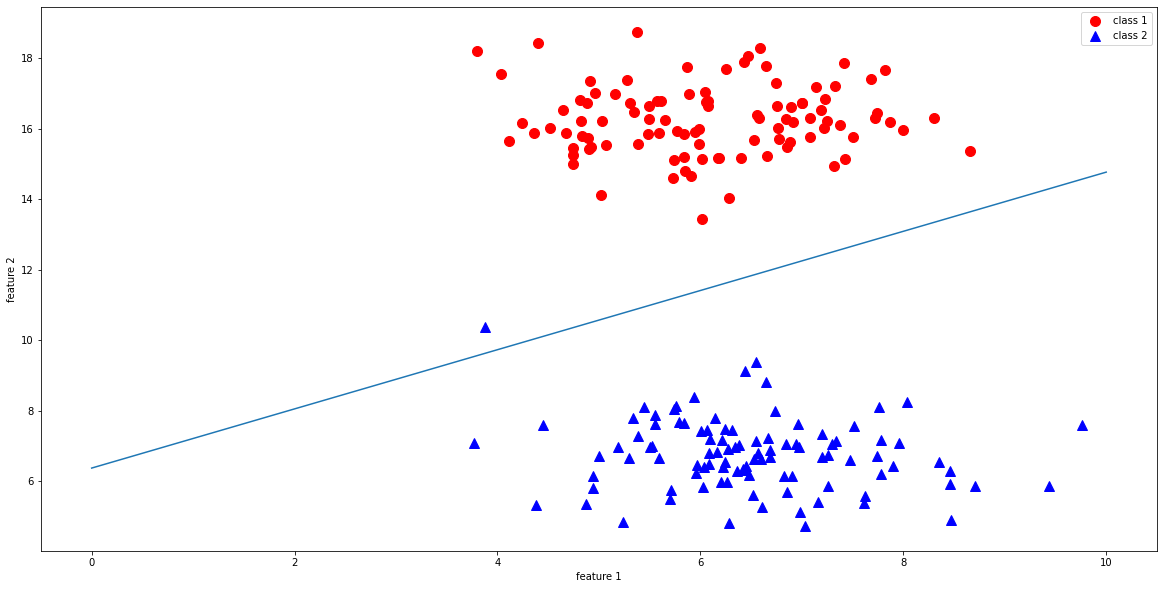

In [16]:
x_plot = np.linspace(0, 10, 500).reshape(-1,1)
y_plot = (-a_1/a_2) * x_plot - (a_3 / a_2)
plt.figure(figsize=(20,10))
plt.plot(class_1[:, 0], class_1[:, 1], "ro", markersize=10, label="class 1")
plt.plot(class_2[:, 0], class_2[:, 1], "b^", markersize=10, label="class 2")
plt.plot(x_plot, y_plot)
plt.xlabel("feature 1")
plt.ylabel("feature 2")
plt.legend()

### SVM for Nonlinear Patterns

Now this example was easy, since clearly the data was linearly separable — we could draw a straight line to separate classes. Sadly, usually things aren’t that simple. Take a look at this case:

<img src="images/nonlinear_svm.png" alt="non linear data" width="400" height="400">

It’s pretty clear that there’s not a linear decision boundary (a single straight line that separates both tags). However, the vectors are very clearly segregated and it looks as though it should be easy to separate them.

So here’s what we’ll do: we will add a third dimension. Up until now we had two dimensions: x and y. We create a new z dimension, and we rule that it be calculated a certain way that is convenient for us: z = x² + y² (you’ll notice that’s the equation for a circle).
since the data lies into two different circles with different radius, the data in 3-dimensional space would be linearly seperable.
let's look at the x-z plane of this 3-dimensional space.

<img src="images/nonlinear_svm_2.png" alt="non linear data" width="400" height="400">

What can SVM do with this? Let’s see:

<img src="images/nonlinear_svm_3.png" alt="non linear data" width="400" height="400">

What’s left is mapping it back to two dimensions:

<img src="images/nonlinear_svm_4.png" alt="non linear data" width="400" height="400">

**Important Note**: For every linearly unseperable dataset it can be shown that by transforming the data to higher dimensions we can reach a space which the data is linearly seperable.

## Kernel Trick

In our example we found a way to classify nonlinear data by cleverly mapping our space to a higher dimension. However, it turns out that calculating this transformation can get pretty computationally expensive: there can be a lot of new dimensions, each one of them possibly involving a complicated calculation. Doing this for every vector in the dataset can be a lot of work, so it’d be great if we could find a cheaper solution.

And we’re in luck! Here’s a trick: SVM doesn’t need the actual vectors to work its magic, it actually can get by only with the dot products between them. This means that we can sidestep the expensive calculations of the new dimensions.

This is what we do instead:

Imagine the new space we want:
$$
z = x^2 + y^2
$$

$$
\vec{a}.\vec{b}= x_ax_b + y_ay_b + z_az_b \\
\vec{a}.\vec{b}= x_ax_b + y_ay_b + x_a^2y_a^2 + y_a^2 y_b^2
$$

So computing the **dot product** in this new space is equivalent to compute the above function (kernel) in original lower dimension kernel

### Major Kernel Functions

1. Gaussian Kernel:  It is used to perform transformation, when there is no prior knowledge about data.
    $$
    K(x, y) = e^{-\frac{||x - y||^2}{2\sigma}}
    $$

2. RBF Kernel
$$
K(x, y) = e^{-\gamma||x - y||^2}
$$

3. Sigmoid Kernel
$$
K(x, y)=tanh(\gamma x.y+r)
$$

In [17]:
X, y = make_classification(n_samples=300, n_features=2, n_classes=3, n_redundant=0, n_clusters_per_class=1, random_state=41)

In [18]:
class_1 = X[y==0]
class_2 = X[y==1]
class_3 = X[y==2]

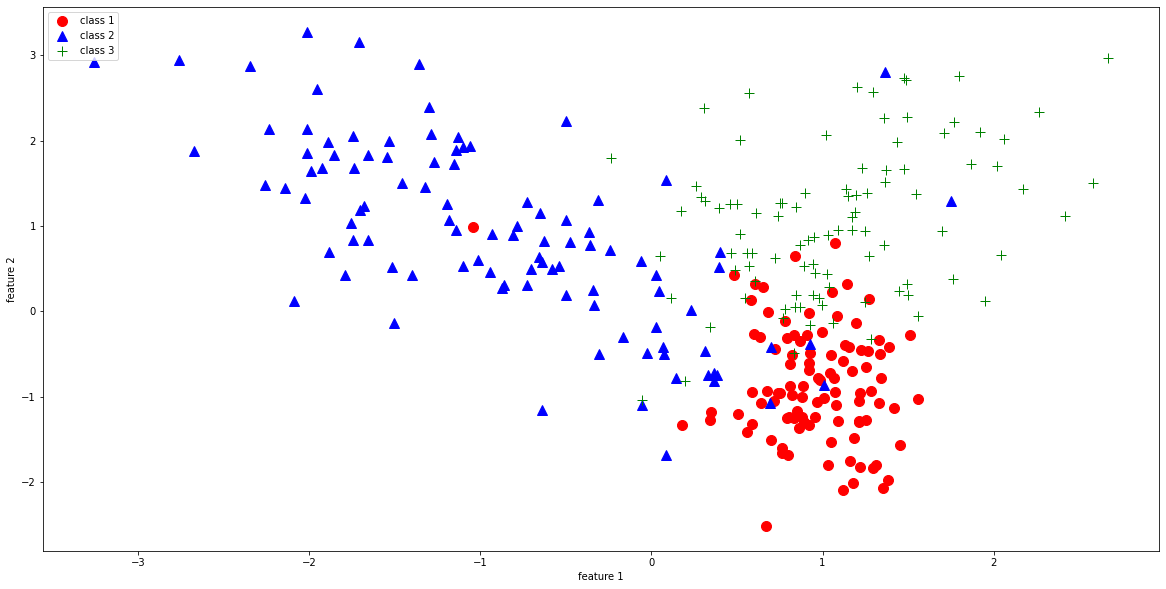

In [19]:
plt.figure(figsize=(20,10))
plt.plot(class_1[:, 0], class_1[:, 1], "ro", markersize=10, label="class 1")
plt.plot(class_2[:, 0], class_2[:, 1], "b^", markersize=10, label="class 2")
plt.plot(class_3[:, 0], class_3[:, 1], "g+", markersize=10, label="class 3")
plt.xlabel("feature 1")
plt.ylabel("feature 2")
plt.legend()

In [20]:
from sklearn.svm import SVC

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [22]:
model = SVC()
model.fit(X_train, y_train)

SVC()

In [23]:
mo
X_test, y_test)

0.9066666666666666

## 3. Decision Tree

Decision Trees are a non-parametric supervised learning method used for classification and regression. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features.

<img src="images/decision_tree.png" alt="decision tree" width="400" height="400">

in each node decision tree pick a feature and apply a binary test on that feature and based on the result of test the tree will be splitted into two new nodes.

For numerical features this test is based on a threshold value, for example: *is feature_1>10?*

And for categorical features it is based on a possible category, for example: *is feature_2 "apartment"?*

This splitting can be continued until just one data remains in a node. However this approach is very probable to fall into the Over Fitting problem. So most of the times we restrict the minimum number of datapoints in a leaf (final node)

In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree, export_graphviz
import graphviz 

In [25]:
model = DecisionTreeClassifier(max_depth=3)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [26]:
model.score(X_test, y_test)

0.8666666666666667

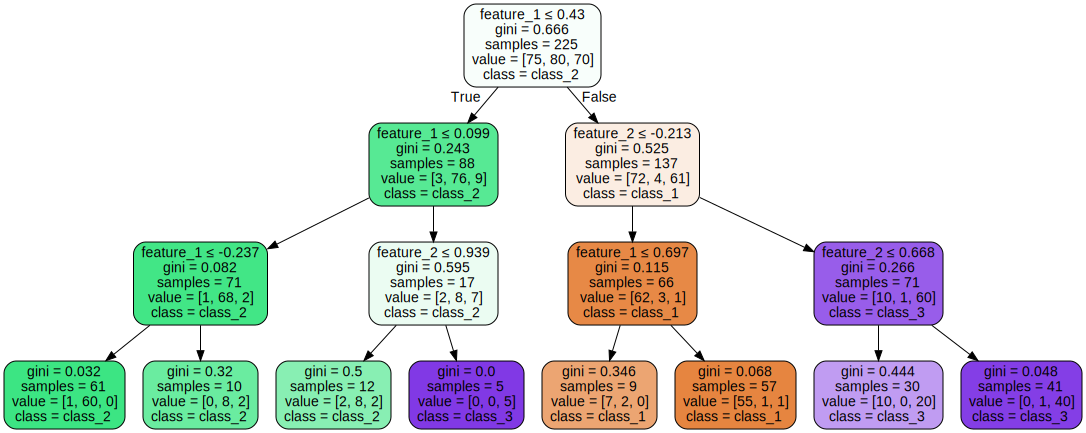

In [27]:
dot_data= export_graphviz(model, out_file=None, 
                      feature_names=["feature_1", "feature_2"],  
                      class_names=["class_1", "class_2", "class_3"],  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)
graph 

#### Some advantages of decision trees are:

* Simple to understand and to interpret. Trees can be visualised.

* Requires little data preparation. Other techniques often require data normalisation, dummy variables need to be created and blank values to be removed. (Scikit Learn doesn't support missing value handling)

* Able to handle both numerical and categorical data. However scikit-learn implementation does not support categorical variables for now. Other techniques are usually specialised in analysing datasets that have only one type of variable.

* Uses a white box model. If a given situation is observable in a model, the explanation for the condition is easily explained by boolean logic. By contrast, in a black box model (e.g., in an artificial neural network), results may be more difficult to interpret.

#### The disadvantages of decision trees include:

* Decision-tree learners can create over-complex trees that do not generalize the data well.(overfitting). Mechanisms such as pruning, setting the minimum number of samples required at a leaf node or setting the maximum depth of the tree are necessary to avoid this problem.

* Decision trees can be unstable because small variations in the data might result in a completely different tree being generated.

* Decision tree learners create biased trees if some classes dominate. It is therefore recommended to balance the dataset prior to fitting with the decision tree.

## Ensemble Methods

Ensemble methods are techniques that create multiple models and then combine them to produce improved results. Ensemble methods usually produces more accurate solutions than a single model would. This has been the case in a number of machine learning competitions, where the winning solutions used ensemble methods.

<img src="images/ensemble.png" alt="ensemble" width="400" height="400">

### Simple Ensemble Methods

#### Majority Voting

Every model makes a prediction (votes) for each test instance and the final output prediction is the one that receives more than half of the votes. If none of the predictions get more than half of the votes, we may say that the ensemble method could not make a stable prediction for this instance.

#### Weighted Voting

Unlike majority voting, where each model has the same rights, we can increase the importance of one or more models. In weighted voting you count the prediction of the better models multiple times. Finding a reasonable set of weights is up to you.

#### Simple Averaging

In simple averaging method, for every instance of test dataset, the average predictions are calculated. This method often reduces overfit and creates a smoother regression model.

#### Weighted Averaging

Weighted averaging is a slightly modified version of simple averaging, where the prediction of each model is multiplied by the weight and then their average is calculated.

### Popular Ensemble Approaches

Although there is nearly an unlimited number of ways that this can be achieved, there are perhaps three classes of ensemble learning techniques that are most commonly discussed and used in practice. Their popularity is due in large part to their ease of implementation and success on a wide range of predictive modeling problems.

<img src="images/ensemble_methods.png" alt="ensemble methods" width="400" height="400">

### Bagging

Bootstrap aggregation, or bagging for short, is an ensemble learning method that seeks a diverse group of ensemble members by varying the training data.

This typically involves **using a single machine learning algorithm**, almost always an **unpruned decision tree**, and training each model on a different subset of the same training dataset. The predictions made by the ensemble members are then combined using simple statistics, such as voting or averaging.

bagging applies **Bootstrap Sampling** to obtain the data subsets for training the base learners.

Bootstrap Sampling is a random sampling method with "replacement".

Replacement means that if a row is selected, it is returned to the training dataset for potential re-selection in the same training dataset. This means that a row of data may be selected zero, one, or multiple times for a given training dataset.

**Random Forest** is the most popular bagging technique.

<img src="images/bagging.png" alt="bagging" width="400" height="400">

### Stacking

Stacked Generalization, or stacking for short, is based on the idea of training a model that would perform the usual aggregation we saw previously.(averaging or majority voting)

In stacking terminology, ensemble members are referred to as level-0 models and the model that is used to combine the predictions is referred to as a level-1 model.

The two-level hierarchy of models is the most common approach, although more layers of models can be used. For example, instead of a single level-1 model, we might have 3 or 5 level-1 models and a single level-2 model that combines the predictions of level-1 models in order to make a prediction.

Any machine learning model can be used to aggregate the predictions, although it is common to use a linear model, such as **linear regression** for regression and **logistic regression** for binary classification.

<img src="images/stacking.png" alt="stacking" width="400" height="400">

### Boosting

Boosting is an ensemble method that seeks to change the training data to focus attention on examples that previous fit models on the training dataset **have gotten wrong**.

The key property of boosting ensembles is the idea of **correcting prediction errors**. The models are fit and added to the ensemble sequentially such that the second model attempts to correct the predictions of the first model, the third corrects the second model, and so on.

Typically, the training dataset is left unchanged and instead, the learning algorithm is modified to pay more or less attention to specific examples (rows of data) based on whether they have been predicted correctly or incorrectly by previously added ensemble members. For example, the rows of data can be **weighed** to indicate the amount of focus a learning algorithm must give while learning the model.

**Ada Boost** and **Gradient Boosting** are two most commonly used boosting algorithm and [XGBoost](https://xgboost.readthedocs.io/en/latest/) and [LightGBM](https://lightgbm.readthedocs.io/en/latest/) are two powerful libraries along with SciKit Learn to train boosting models.

<img src="images/boosting.png" alt="boosting" width="400" height="400">

## 3. Random Forest

Random Forest is the most popular Bagging method and is used in many machine learning projects and competitions. Random forest, like its name implies, consists of a large number of individual decision trees that operate as an ensemble.

<img src="images/random_forest.jpeg" alt="random forest" width="400" height="400">

The low correlation between trees is the key in Random Forest. Just like how investments with low correlations (like stocks and bonds) come together to form a portfolio that is greater than the sum of its parts, uncorrelated models can produce ensemble predictions that are more accurate than any of the individual predictions. 

So how does random forest ensure that the behavior of each individual tree is not too correlated with the behavior of any of the other trees in the model? It uses the following two methods:

1. Bagging (Bootstrap sampling)
2. Feature Randomness: In a normal decision tree, when it is time to split a node, we consider every possible feature and pick the one that produces the most separation between the observations in the left node vs. those in the right node. In contrast, each tree in a random forest can pick only from a random subset of features. This forces even more variation amongst the trees in the model and ultimately results in lower correlation across trees and more diversification.

<img src="images/random_forest_2.jpeg" alt="random forest" width="400" height="400">

Jeremy Howard has a great [video lectures](https://www.youtube.com/watch?v=CzdWqFTmn0Y&list=PLfYUBJiXbdtSyktd8A_x0JNd6lxDcZE96) on Random Forest.

In [28]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

In [29]:
models = {"Random Forest": RandomForestClassifier(max_depth=3),
         "AdaBoost": AdaBoostClassifier(n_estimators=100),
         "GradientBoosting": GradientBoostingClassifier()}

In [30]:
for model_name, model in models.items():
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    print("model {0} has accuracy: {1}".format(model_name, score))

model Random Forest has accuracy: 0.88
model AdaBoost has accuracy: 0.76
model GradientBoosting has accuracy: 0.8533333333333334


Note that all of these tree based algorithms can be employ in regression problems too.